### Audio signal processing - PyTorch
#### Rajesh Siraskar 29-Apr-2021

- Utilities are taken from https://github.com/pytorch/tutorials/blob/master/beginner_source/audio_preprocessing_tutorial.py
- Colab is at https://colab.research.google.com/drive/1bJWtQrGwxY-KHSmz4k1miNydHGHEF0W7#scrollTo=ho7a9t1o_HDL
- For deep-learning: 
  - train_dataset = torchaudio.datasets.LIBRISPEECH("./", url="train-clean-100", download=True)
  - test_dataset = torchaudio.datasets.LIBRISPEECH("./", url="test-clean", download=True)
  
 - Ver 1.1: Cleaned and kept only used functions

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
import librosa

import torch
import torchaudio

print("torch version:", torch.__version__)
print("torchaudio version:", torchaudio.__version__)

torch version: 1.8.1+cpu
torchaudio version: 0.8.1


In [12]:
import os
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import IPython.display as ipd
%matplotlib inline

### Utilities

- Note on the custom function `print_plot_play` vs PyTorch tutorial fn. `plot_waveform`
- Profiling returned time consumed: `print_plot_play: 0.27 s` and `plot_waveform: 5.70 s`

In [13]:
def print_plot_play(x, Fs, text=''):
    """1. Prints information about an audio singal, 2. plots the waveform, and 3. Creates player
    
    Args: 
        x: Input signal
        Fs: Sampling rate of x    
        text: Text to print
    """
    print('%s Fs = %d, x.shape = %s, x.dtype = %s' % (text, Fs, x.shape, x.dtype))
    plt.figure(figsize=(8, 2))
    plt.plot(x, color='gray')
    plt.xlim([0, x.shape[0]])
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    ipd.display(ipd.Audio(data=x, rate=Fs))
    
def plot_specgram(waveform, sample_rate, title="Spectrogram", xlim=None):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    axes[c].specgram(waveform[c], Fs=sample_rate)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
      axes[c].set_xlim(xlim)
  figure.suptitle(title)
  plt.show(block=False)

### Basic audio flle processing

Piano .wav file:  Fs = 11025, x.shape = (45504,), x.dtype = float32


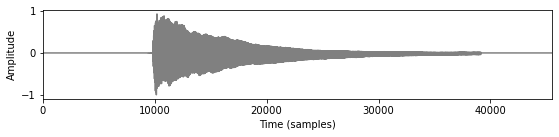

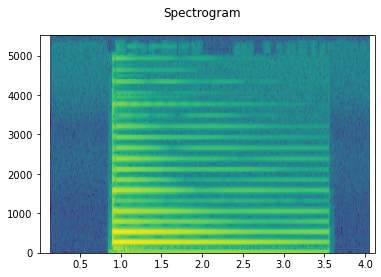

In [14]:
# Analyze piano audio file
afile = os.path.join('..', 'D:/Work Folder/R&D/AudioProcessing/', 'FMP_B_Note-C4_Piano.wav')
waveform, sample_rate = librosa.load(afile, sr=None)
print_plot_play(x=waveform, Fs=sample_rate, text='Piano .wav file: ')

waveform, sample_rate = torchaudio.load(afile)
plot_specgram(waveform, sample_rate)

Hello World wav file:  Fs = 48000, x.shape = (581632,), x.dtype = float32


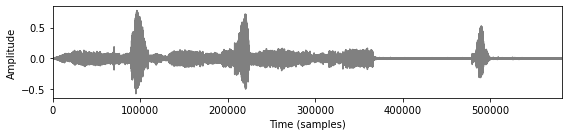

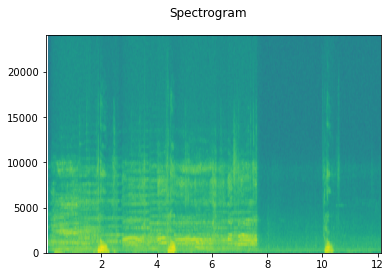

In [15]:
# Analyze personal .wav file
afile = os.path.join('..', 'D:/Work Folder/R&D/AudioProcessing/', 'HelloAudioWorld_2.wav')

waveform, sample_rate = librosa.load(afile, sr=None)
print_plot_play(x=waveform, Fs=sample_rate, text='Hello World wav file: ')

waveform, sample_rate = torchaudio.load(afile)
plot_specgram(waveform, sample_rate)